# Dimension Reduction: PCA: Principal Component Analysis

* __Author: Prof. Nagiza F. Samatova__
* __Email: samatova@csc.ncsu.edu__
* __Date: November 8, 2018__

In [59]:
import mglearn

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial.distance as sp

import sklearn.decomposition as decomposition
from sklearn import datasets

# Read more:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

+ __Create a Synthetic Data Set__

[[3 3]
 [3 1]
 [3 5]
 [4 4]
 [2 2]
 [1 1]]


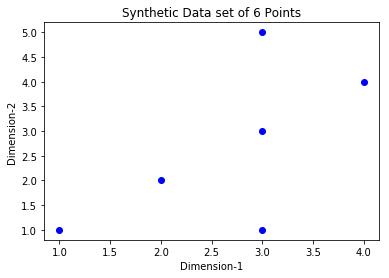

In [3]:
a = [3,3]
b = [3,1]
c = [3,5]
d = [4,4]
e = [2,2]
f = [1,1]

X = np.array([a,b,c,d,e,f])
print (X)

# plot (X[,1], X[,2])
plt.plot(X[:,0],X[:,1],'bo')
plt.xlabel("Dimension-1")
plt.ylabel("Dimension-2")
plt.title("Synthetic Data set of 6 Points")
plt.show()

+ __Measure Total Variance in the Data __
    - variance-covariance matrix
    - with diagonal elements showing the variance within columns

In [4]:
Cov_X = np.cov(X.T)
Cov_X

array([[1.06666667, 1.06666667],
       [1.06666667, 2.66666667]])

In [5]:
# Total variance: sum of diagonal elements 
total_variance = np.sum(np.diag(Cov_X))
print("{:.3f} : Total Variance in the Data".format(total_variance))

3.733 : Total Variance in the Data


+ __Identity Matrix__ 
    + _Identity_ matrix: diagonal elements are 1, and off diagonal elements are zero
        * The product of a matrix and identity matrix is the original matrix

In [16]:
I = np.diag([1,1])
I

array([[1, 0],
       [0, 1]])

In [17]:
# identity matrix does not change X when multiplied with X
np.matmul(X,I)

array([[3, 3],
       [3, 1],
       [3, 5],
       [4, 4],
       [2, 2],
       [1, 1]])

In [18]:
X

array([[3, 3],
       [3, 1],
       [3, 5],
       [4, 4],
       [2, 2],
       [1, 1]])

+ __Projection Matrix__ 
    + _Projection_ matrix: one or more diagnoal elements of the identity matrix are zero
        * Product of projection matrix with matrix X is the same as:
            - keeping only those dimensions of X for which projection's matrix has noon-zero diagonal value

In [19]:
P = I
P[0, 0] = 0
P

array([[0, 0],
       [0, 1]])

+ __Project X onto the Second Dimension__
    - Multiple X with the projection matrix:
        * with 1 in the second diagonal element and 
        * zeros for the rest diagonal elements

In [20]:
P_X = np.matmul(X,P)
P_X

array([[0, 3],
       [0, 1],
       [0, 5],
       [0, 4],
       [0, 2],
       [0, 1]])

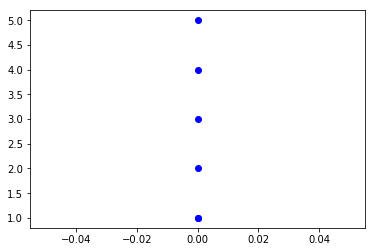

In [21]:
plt.plot(P_X[:,0],P_X[:,1],'bo')
plt.show()

__Observations__:
* Projection on the second axis, arranged the data on a line (1D)
* All the points have value 0 for the first dimension
* The number of visible pointes reduced from 6 to 5
* Because some points are mapped to the same points:
    - as they have the same value for the first dimension
    - this collision leads to information loss: b
        * before such points were distinct, separable
        * now after the information loss, they became non-distinguishable

+ __Measure the Amount of Variance Preserved in the Projected Data__
    - Let's quantify the amount of information loss
    - By measure the amount of variance lost or preserved after dimension reduction

In [22]:
Cov_P_X = np.cov(P_X.T)
Cov_P_X

array([[0.        , 0.        ],
       [0.        , 2.66666667]])

In [23]:
preserved_variance = sum(np.diag(Cov_P_X))
print ("{:.3f} : Preserved variance".format(preserved_variance))

2.667 : Preserved variance


+ __Measure Percentage of Variance Preserved__

In [24]:
percentage_preserved_variance = 100 * (preserved_variance / total_variance)
print ("{:.3f}% : Percentage of the total variance preserved after projecting onto the first dimension".format(percentage_preserved_variance))

71.429% : Percentage of the total variance preserved after projecting onto the first dimension


__Observations:__
+ Only 28% of the original variance was preserved after projecting the data onto the second dimension
> How much variance is preserved by projecting onto first dimension




+ __Project X onto the First Dimension__
    - Multiple X with the projection matrix:
        * with 1 in the first diagonal element and 
        * zeros for the rest diagonal elements

In [29]:
I = np.diag([1, 1])
P = I
P[1, 1] = 0
P

array([[1, 0],
       [0, 0]])

In [30]:
P_X = np.matmul(X,P)
P_X

array([[3, 0],
       [3, 0],
       [3, 0],
       [4, 0],
       [2, 0],
       [1, 0]])

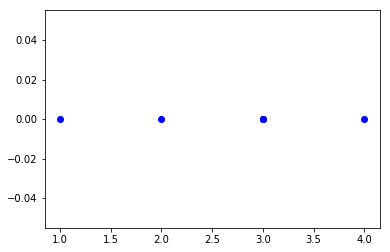

In [31]:
plt.plot(P_X[:,0],P_X[:,1],'bo')
plt.show()

__Observations__:
* Projection on the second axis, arranged the data on a line (1D)
* All the points have value 0 for the first dimension
* The number of visible pointes reduced from 6 to 4
* Because some points are mapped to the same points:
    - as they have the same value for the first dimension
    - this collision leads to information loss: b
        * before such points were distinct, separable
        * now after the information loss, they became non-distinguishable
        
+ __Measure the Amount of Variance Preserved in the Projected Data__
    - Let's quantify the amount of information loss
    - By measure the amount of variance lost or preserved after dimension reduction


In [32]:
Cov_P_X = np.cov(P_X.T)
Cov_P_X

array([[1.06666667, 0.        ],
       [0.        , 0.        ]])

In [33]:
preserved_variance = sum(np.diag(Cov_P_X))
print ("{:.3f} : Preserved variance".format(preserved_variance))

1.067 : Preserved variance


In [34]:
percentage_preserved_variance = 100 * (preserved_variance / total_variance)
print ("{:.3f}% : Percentage of the total variance preserved after projecting onto the first dimension".format(percentage_preserved_variance))

28.571% : Percentage of the total variance preserved after projecting onto the first dimension


## PCA for Dimension Reduction

+ __Create a PCA object and fit a PCA Model to the Original Data__

In [35]:
pca = decomposition.PCA (n_components=2,svd_solver='full')
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [36]:
pca_model = pca.fit(X)
pca_model

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [37]:
# read PCA documentation
decomposition.PCA?

+ __Rotate / Transform X using the Rotation Matrix of the PCA Model__
    - Note that rotation does ___not___ change the data:
        * it preserved the relationship between the points such as distances, engles, variances
        * it is an _isotropic_ transformation: data points are kep ___as is___; only the axes rotate
    - It literally rotates the coordinate axes while keeping the original data intact
    - It re-expresses the original coordinates of the data in terms of the new rotated coordinate axes

> The new, rotated axes from the `pca_model`, are called ___Principal Components___, or ___PC___

In [38]:
# Coordinates of the points after rotation
X_rotated = pca_model.transform(X)
X_rotated

array([[ 0.4472136 ,  0.1490712 ],
       [-1.34164079,  1.04349839],
       [ 2.23606798, -0.74535599],
       [ 1.78885438,  0.59628479],
       [-0.89442719, -0.2981424 ],
       [-2.23606798, -0.74535599]])

In [39]:
# Coordinates of the points before rotation
X

array([[3, 3],
       [3, 1],
       [3, 5],
       [4, 4],
       [2, 2],
       [1, 1]])

+ __Confirm that the Total Variance of Rotated Data is the Same as the Original Data__

In [40]:
total_variance_rotated = np.sum(np.diag(np.cov(X_rotated.T)))
print("{:.3f} : Total Variance of the Rotated Data".format(total_variance_rotated))
print("{:.3f} : Total Variance in the Original Data".format(total_variance))

3.733 : Total Variance of the Rotated Data
3.733 : Total Variance in the Original Data


+ __Project Rotated Data onto the First Dimension__

In [43]:
P_X_rot = np.matmul(X_rotated,P)
P_X_rot

array([[ 0.4472136 ,  0.        ],
       [-1.34164079,  0.        ],
       [ 2.23606798,  0.        ],
       [ 1.78885438,  0.        ],
       [-0.89442719,  0.        ],
       [-2.23606798,  0.        ]])

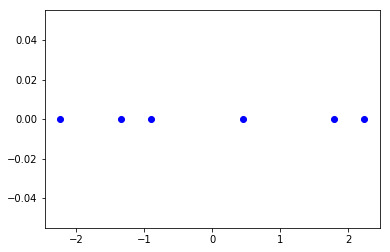

In [44]:
plt.plot(P_X_rot[:,0],P_X_rot[:,1],'bo')
plt.show()

__Observations__:
+ Projection on the first axis, arranged the data on a line (1D)
* All the points have value 0 for the second dimension
* The number of visible pointes is still 6 out of 6: ___no collision___

In [49]:
Cov_P_X = np.cov(P_X_rot.T)
preserved_variance = np.diag(Cov_P_X).sum()
preserved_variance

3.1999999999999993

+ __Measure the Percentage of Variance Preserved__

In [50]:
# Rotated data projected onto the first dimension
pres_var_rot = sum(np.diag(np.cov(P_X_rot.T)))
perc_pres_var_rot= 100 * (pres_var_rot / total_variance)
print ("{:.3f}% : After Rotation: Percentage of the total variance preserved after projecting onto the first dimension".format(perc_pres_var_rot))
print ("{:.3f}% : Before Rotation: Percentage of the total variance preserved after projecting onto the first dimension".format(percentage_preserved_variance))

85.714% : After Rotation: Percentage of the total variance preserved after projecting onto the first dimension
28.571% : Before Rotation: Percentage of the total variance preserved after projecting onto the first dimension


> + Prinicpal components (PCs) are also called ___eigenvectors___. 
+ Projecting data onto the principal components _maximally_ preserves the variance of the original data

## Explore Attributes of the PCA Model

+ __Eigenvectors: Principal Components__
    - _PC: Principal Component: Eigenvector_: New coordinate axis expressed in terms of the original axes

In [51]:
pca_model.components_

array([[ 0.4472136 ,  0.89442719],
       [ 0.89442719, -0.4472136 ]])

In [56]:
# The first PC column vector:
PC1 = pca_model.components_[0]
print(PC1)
np.linalg.norm(PC1)

[0.4472136  0.89442719]


0.9999999999999999

In [58]:
PC2 = pca_model.components_[1]
print(PC2)
np.linalg.norm(PC2)

[ 0.89442719 -0.4472136 ]


0.9999999999999999

In [61]:
sp.cosine(PC1, PC2)

1.0

+ __Eigenvalues: Amount of Variance Explained by Each Principal Component__
    - _Eigenvalue_: The square root of the amount of variance preserved if the original data is projected only onto this single PC:
        - Eigenvalues are _non-negative_
    - Eigenvalues are ___sorted___: from the highest for the first PC to the smallest for the last PC
    - The total variance: the sum of the squared values of the explained variances across all the PCs

In [66]:
eigenvalues = np.sqrt(pca_model.explained_variance_)
print ("{:.3f} : The first eigenvalue: the square root of the amount of variance preserved upon projection on PC-1".format(eigenvalues[0]))
print ("{:.3f} : The second eigenvalue: the square root of the amount of variance preserved upon projection on PC-2".format(eigenvalues[1]))

1.789 : The first eigenvalue: the square root of the amount of variance preserved upon projection on PC-1
0.730 : The second eigenvalue: the square root of the amount of variance preserved upon projection on PC-2


In [67]:
total_pca_var = sum(pca_model.explained_variance_)
print ("{:.3F} : Total variance across all PCs".format(total_pca_var))

3.733 : Total variance across all PCs


+ __Percentage of the Variance Explained by Each PC__
    - Monotonically decreasing sequence: the first PC explains the most of the variance

In [64]:
pc = 1
for pc_var in pca_model.explained_variance_:
    percentage_pc_var = 100 * (pc_var / total_pca_var)
    print ("{:.3f}% : Percentage explained by PC-{}".format(percentage_pc_var, pc))
    pc = pc + 1

85.714% : Percentage explained by PC-1
14.286% : Percentage explained by PC-2


+ __Screeplot: Plot of Explained Variances across all PCs__

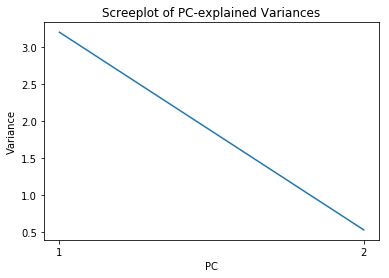

In [65]:
plt.plot([1,2], pca_model.explained_variance_)
plt.xticks([1,2])
plt.title("Screeplot of PC-explained Variances")
plt.xlabel("PC")
plt.ylabel("Variance")
plt.show()

+ __Cumulative Variance Explained by the PCA Model__

In [29]:
np.sqrt(pca_model.explained_variance_)
pca_model.explained_variance_ratio_
np.cumsum(pca_model.explained_variance_ratio_)

array([0.85714286, 1.        ])

## PCA with Real Data Set

In [ ]:
iris.<TAB>

In [30]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)
print(X[0:5])
print (iris.target_names)
print (y[[0, 51, 101]])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 1 2]


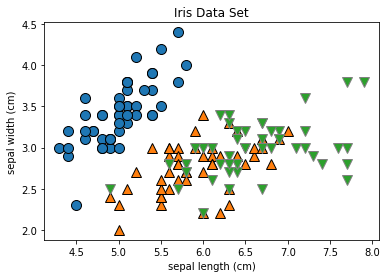

In [31]:
# Plot original 4-D iris data in 2D
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title("Iris Data Set")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()

In [32]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_rot = pca.transform(X)

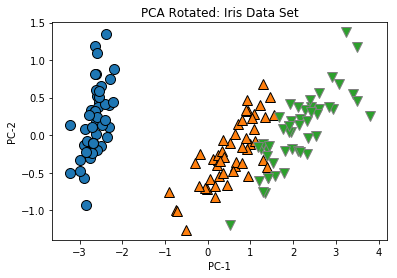

In [33]:
# Plot rotated 4-D iris data in 2D: the first two PCs
mglearn.discrete_scatter(X_rot[:, 0], X_rot[:, 1], y)
plt.title("PCA Rotated: Iris Data Set")
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()